# Plot record breaking statistic

The notebook is to demostrate the statistic analysis performed in the Hsu and Yin 2019 paper on the GMST record-breaking event assoicated with the El Nino.  



### Load module

In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


### Load Dataset

In [2]:
# input path and filename
basedir=os.getcwd()
datadir='%s/data/'%(basedir)
filename='Nino3.4_GMST_record_stat_s2006_e2100_allnino0.5_smon3_moncon5.sen30yearbase_hsu2019.nc'
ds_stat=xr.open_dataset(os.path.join(basedir,datadir,filename))

# output filename
ext='cmip5_allelnino'

### Quick look of the Dataset

In [3]:
ds_stat

<xarray.Dataset>
Dimensions:              (exp: 4, model_name: 57)
Coordinates:
  * model_name           (model_name) object u'ACCESS1.0' ... u'FIO-ESM'
  * exp                  (exp) |S5 'rcp45' 'rcp26' 'rcp85' 'rcp60'
Data variables:
    likelihood           (model_name, exp) float64 ...
    amplitude            (model_name, exp) float64 ...
    amplitude_conf       (model_name, exp) float64 ...
    total_elnino         (model_name, exp) float64 ...
    elnino_record        (model_name, exp) float64 ...
    gmst_record          (model_name, exp) float64 ...
    total_gmst           (model_name, exp) float64 ...
    climate_sensitivity  (model_name, exp) float64 ...
    ext_forcing          (model_name, exp) float64 ...
    int_variability      (model_name, exp) float64 ...

### Pickout available models (38) out of all models (57)

In [4]:
#### determine models with results
anyexp_ind=np.where(ds_stat.total_gmst.sum(dim='exp')>0.)[0]
print "Available %i models including: "%len(anyexp_ind)
print ds_stat.model_name[anyexp_ind].values

Available 38 models including: 
[u'ACCESS1.0' u'ACCESS1.3' u'BCC-CSM1.1' u'CCSM4' u'CESM1(BGC)'
 u'CESM1(CAM5)' u'CMCC-CESM' u'CMCC-CM' u'CMCC-CMS' u'CNRM-CM5'
 u'CSIRO-Mk3.6.0' u'CanESM2' u'EC-EARTH' u'FGOALS-s2' u'GFDL-CM3'
 u'GFDL-ESM2G' u'GFDL-ESM2M' u'GISS-E2-H' u'GISS-E2-H-CC' u'GISS-E2-R'
 u'GISS-E2-R-CC' u'HadGEM2-AO' u'HadGEM2-CC' u'HadGEM2-ES' u'INM-CM4'
 u'IPSL-CM5A-LR' u'IPSL-CM5A-MR' u'IPSL-CM5B-LR' u'MIROC-ESM'
 u'MIROC-ESM-CHEM' u'MIROC5' u'MPI-ESM-LR' u'MPI-ESM-MR' u'MRI-CGCM3'
 u'MRI-ESM1' u'NorESM1-M' u'NorESM1-ME' u'FIO-ESM']


### Calculate multi-model ensemble mean

In [5]:
import scipy.stats

#### Calculate the Ensemble mean 
# use all available model in each exp
# calculate the error bar base on the number of standard deviation
# the standard error is derived base on Students's T distribution

stTconfint=0.95  # confidence interval

### initialize list for ensemble mean
ens_amp=[]
ens_amp_conf=[]

ens_like=[]
ens_like_conf=[]
ens_total_elnino=[]
ens_total_elnino_conf=[]
ens_record_elnino=[]
ens_record_elnino_conf=[]

ens_like_gmst=[]
ens_like_gmst_conf=[]
ens_total_gmst=[]
ens_total_gmst_conf=[]
ens_record_gmst=[]
ens_record_gmst_conf=[]


### loop different RCP
for e in ds_stat.exp.values:
    
    # model with El Nino
    elnino_exist_ind=np.where(ds_stat['total_elnino'].sel(exp=e)>0.)[0]
    nmodel_elnino=len(elnino_exist_ind)
    
    # model with GMST record assoicated to El Nino
    record_elnino_exist_ind=np.where(ds_stat['elnino_record'].sel(exp=e)>0.)[0]
    nmodel_record_elnino=len(record_elnino_exist_ind)
    
    # model with GMST record
    record_exist_ind=np.where(ds_stat['total_gmst'].sel(exp=e)>0.)[0]
    nmodel_record=len(record_exist_ind)

    # calculate ens mean and std of magnitude
    amp_mean=np.nanmean(ds_stat['amplitude'].sel(exp=e)[record_elnino_exist_ind])
    amp_std=np.nanstd(ds_stat['amplitude'].sel(exp=e)[record_elnino_exist_ind])

    # calculate ens mean and std of likelihood, total El Nino, El Nino followed by record GMST
    like_mean=np.nanmean(ds_stat['likelihood'].sel(exp=e)[elnino_exist_ind])
    like_std=np.nanstd(ds_stat['likelihood'].sel(exp=e)[elnino_exist_ind])
    total_elnino_mean=np.nanmean(ds_stat['total_elnino'].sel(exp=e)[elnino_exist_ind])
    total_elnino_std=np.nanstd(ds_stat['total_elnino'].sel(exp=e)[elnino_exist_ind])
    record_elnino_mean=np.nanmean(ds_stat['elnino_record'].sel(exp=e)[elnino_exist_ind])
    record_elnino_std=np.nanstd(ds_stat['elnino_record'].sel(exp=e)[elnino_exist_ind])

    # calculate ens mean and std of likelihood, total record GMST, record GMST following El Nino
    like_gmst_mean=np.nanmean(ds_stat['gmst_record'].sel(exp=e)[record_exist_ind]/ds_stat['total_gmst'].sel(exp=e)[record_exist_ind])*100.
    like_gmst_std=np.nanstd(ds_stat['gmst_record'].sel(exp=e)[record_exist_ind]/ds_stat['total_gmst'].sel(exp=e)[record_exist_ind])*100.
    total_gmst_mean=np.nanmean(ds_stat['total_gmst'].sel(exp=e)[record_exist_ind])
    total_gmst_std=np.nanstd(ds_stat['total_gmst'].sel(exp=e)[record_exist_ind])
    record_gmst_mean=np.nanmean(ds_stat['gmst_record'].sel(exp=e)[record_exist_ind])
    record_gmst_std=np.nanstd(ds_stat['gmst_record'].sel(exp=e)[record_exist_ind])  

    # determine confidence interval
    alpha=1.0-stTconfint
    nstd_elnino=scipy.stats.t.ppf(1.0-(alpha/2.0),nmodel_elnino-1)
    nstd_record_elnino=scipy.stats.t.ppf(1.0-(alpha/2.0),nmodel_record_elnino-1)
    nstd_record=scipy.stats.t.ppf(1.0-(alpha/2.0),nmodel_record-1)

    # store ens mean and confidence interval
    ens_amp.append(amp_mean)
    ens_amp_conf.append(nstd_record_elnino*amp_std/np.sqrt(nmodel_record_elnino))
    
    ens_like.append(like_mean)
    ens_like_conf.append(nstd_elnino*like_std/np.sqrt(nmodel_elnino))
    ens_total_elnino.append(total_elnino_mean)
    ens_total_elnino_conf.append(nstd_elnino*total_elnino_std/np.sqrt(nmodel_elnino))
    ens_record_elnino.append(record_elnino_mean)
    ens_record_elnino_conf.append(nstd_elnino*record_elnino_std/np.sqrt(nmodel_elnino))

    ens_like_gmst.append(like_gmst_mean)
    ens_like_gmst_conf.append(nstd_record*like_gmst_std/np.sqrt(nmodel_record))
    ens_total_gmst.append(total_gmst_mean)
    ens_total_gmst_conf.append(nstd_record*total_gmst_std/np.sqrt(nmodel_record))
    ens_record_gmst.append(record_gmst_mean)
    ens_record_gmst_conf.append(nstd_record*record_gmst_std/np.sqrt(nmodel_record))
    
    

### Plot Magnitude

Magnitude of record-breaking GMST happening during El Nino event

/storage1/home1/chiaweih/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


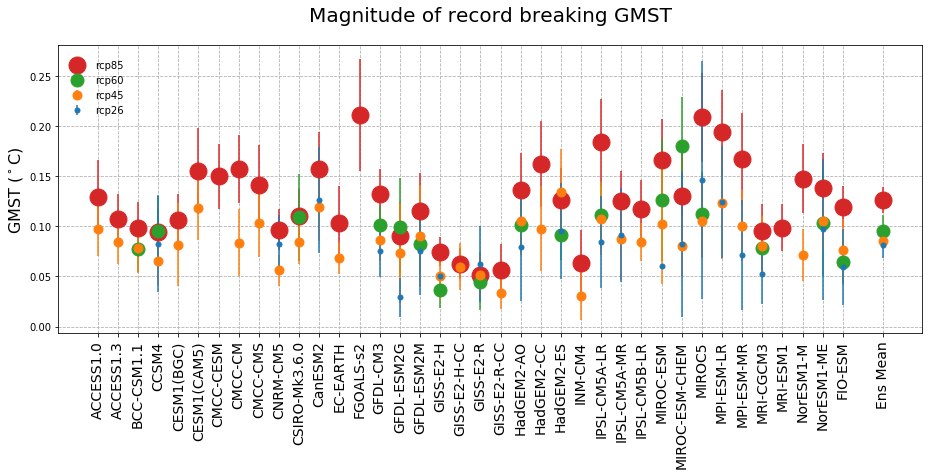

In [6]:
fig=plt.figure()
ax1=fig.add_axes([0,0,2,1])
index=range(len(ds_stat.model_name[anyexp_ind])) # xaxis
allmodel=ds_stat.model_name[anyexp_ind].values   # xtick lable
       
rcp_order=['rcp85','rcp60','rcp45','rcp26']
color_order=['C3','C2','C1','C0']

for ii, exp in enumerate(rcp_order):
    ampl_array=ds_stat.amplitude.sel(exp=exp)[anyexp_ind].copy().values
    ampl_conf_array=ds_stat.amplitude_conf.sel(exp=exp)[anyexp_ind].copy().values               
    notsig_ind=np.where(ampl_array-ampl_conf_array<0.)[0]
    if len(notsig_ind)>0. :
        ampl_conf_array[notsig_ind]=np.nan  
    ax1.errorbar(index,ampl_array, 
                 yerr=ampl_conf_array,
                 marker='o', markersize=17-4*ii,
                 linestyle='none',label=exp,color=color_order[ii])

for ii, exp in enumerate(rcp_order):
    exp_ind=np.where(ds_stat.exp.values==exp)[0][0]
    ax1.errorbar(index[-1]+2,ens_amp[exp_ind], 
                 yerr=ens_amp_conf[exp_ind],
                 marker='o', markersize=17-4*ii,
                 linestyle='none',color=color_order[ii])
   
index=np.append(index,index[-1]+2)
allmodel=np.append(allmodel,"Ens Mean")

ax1.legend(bbox_to_anchor=(0.,0.98),loc="upper left",frameon=False)
ax1.set_xticks(index)
ax1.set_xticklabels(allmodel,rotation=90,fontdict={'fontsize':'14'})
ax1.set_title("Magnitude of record breaking GMST",{'size':'20'},pad=24)
ax1.set_ylabel('GMST ($^\circ$C)',{'size':'16'})
ax1.grid(linestyle='dashed')


fig.savefig('%s/figure/stats_amp_%s.pdf'%(basedir,ext), dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches="tight", pad_inches=None,
            frameon=None) 

### Plot likelihood

Likelihood of record-breaking GMST happening during El Nino event

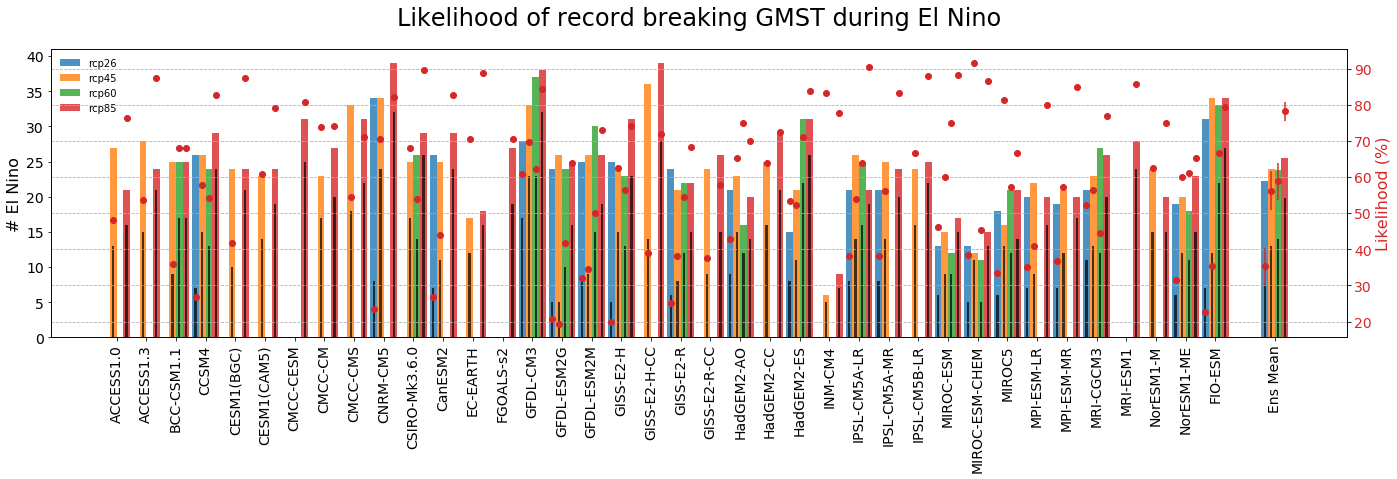

In [7]:
fig100=plt.figure(100)
ax100=fig100.add_axes([0,0,3,1])
ax200=ax100.twinx()
index=range(len(ds_stat.model_name[anyexp_ind]))
allmodel=ds_stat.model_name[anyexp_ind].values

all_width = 1-0.1    # the width of the bars that includes all exp

rcp_order=['rcp26','rcp45','rcp60','rcp85']
color_order=['C0','C1','C2','C3']

# determine the xaxis location of each exp
num_exp=len(rcp_order)
width=all_width/np.float(num_exp)
if num_exp%2 == 1 :
    halfnum=num_exp/2
    xloc=np.arange(num_exp)*width
    xloc-=halfnum*width
else:
    halfnum=num_exp/2
    xloc=np.arange(num_exp)*width
    xloc=xloc-halfnum*width+width*0.5
                         
for ii, exp in enumerate(rcp_order):
    total_elnino_array=ds_stat.total_elnino.sel(exp=exp)[anyexp_ind].values
    elnino_record_array=ds_stat.elnino_record.sel(exp=exp)[anyexp_ind].values      
    likelihood_array=ds_stat.likelihood.sel(exp=exp)[anyexp_ind].values
        
    p1_bars = ax100.bar(np.array(index)+xloc[ii], total_elnino_array, width, label=rcp_order[ii],color=color_order[ii],alpha=0.8)
    p2_bars = ax100.bar(np.array(index)+xloc[ii], elnino_record_array, width/3.,color='K',alpha=0.7)
    ax200.plot(np.array(index)+xloc[ii],likelihood_array,color='tab:red',marker='o',linestyle='none') 


for ii, exp in enumerate(rcp_order):
    exp_ind=np.where(ds_stat.exp.values==exp)[0][0]
    p1_bars = ax100.bar(np.float(index[-1]+2)+xloc[ii], ens_total_elnino[exp_ind], width ,color=color_order[ii],alpha=0.8)
    p2_bars = ax100.bar(np.float(index[-1]+2)+xloc[ii], ens_record_elnino[exp_ind], width/3.,color='K',alpha=0.7)
    ax200.errorbar(np.float(index[-1]+2)+xloc[ii],ens_like[exp_ind],yerr=ens_like_conf[exp_ind],color='tab:red',marker='o',linestyle='none') 
   
index=np.append(index,index[-1]+2)
allmodel=np.append(allmodel,"Ens Mean")
   
ax100.set_ylabel('# El Nino',{'size':'16'})
ax100.tick_params(axis='y',labelsize=14)
ax100.set_xticks(index)
ax100.set_xticklabels(allmodel,rotation=90,fontdict={'fontsize':'14'})
ax100.set_title("Likelihood of record breaking GMST during El Nino",{'size':'24'},pad=24)
ax100.legend(frameon=False,loc="upper left")
ax200.set_ylabel('Likelihood (%)',{'size':'16'}, color='tab:red')
ax200.tick_params(axis='y',labelsize=14,labelcolor='tab:red')
ax200.grid(linestyle='dashed')

fig100.savefig('%s/figure/stats_like_%s.pdf'%(basedir,ext), dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches="tight", pad_inches=None,
            frameon=None) 


### Plot likelihood

Likelihood of record-breaking GMST happening due to El Nino event

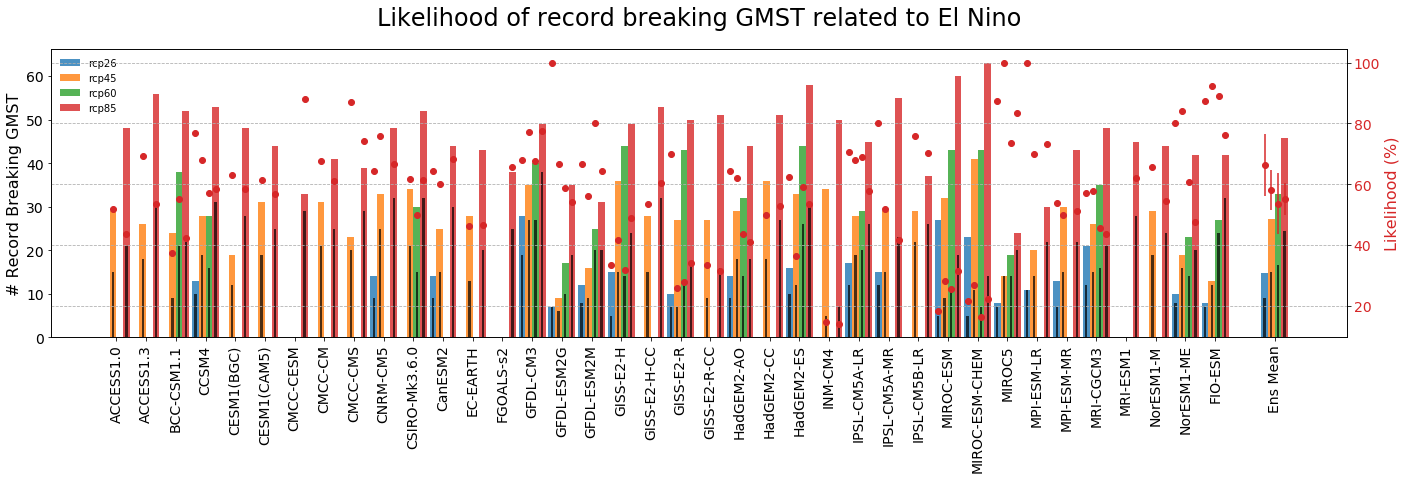

In [8]:

fig100=plt.figure(100)
ax100=fig100.add_axes([0,0,3,1])
ax200=ax100.twinx()

index=range(len(ds_stat.model_name[anyexp_ind]))
allmodel=ds_stat.model_name[anyexp_ind].values

all_width = 1-0.1    # the width of the bars that includes all exp

rcp_order=['rcp26','rcp45','rcp60','rcp85']
color_order=['C0','C1','C2','C3']

# determine the xaxis location of each exp
num_exp=len(rcp_order)
width=all_width/np.float(num_exp)
if num_exp%2 == 1 :
    halfnum=num_exp/2
    xloc=np.arange(num_exp)*width
    xloc-=halfnum*width
else:
    halfnum=num_exp/2
    xloc=np.arange(num_exp)*width
    xloc=xloc-halfnum*width+width*0.5
                         

for ii, exp in enumerate(rcp_order):
    total_gmst_array=ds_stat.total_gmst.sel(exp=exp)[anyexp_ind].values
    gmst_record_array=ds_stat.gmst_record.sel(exp=exp)[anyexp_ind].values    

    likelihood_gmst_array=gmst_record_array/total_gmst_array*100    
    p1_bars = ax100.bar(np.array(index)+xloc[ii], total_gmst_array, width, label=rcp_order[ii],color=color_order[ii],alpha=0.8)
    p2_bars = ax100.bar(np.array(index)+xloc[ii], gmst_record_array, width/3.,color='K',alpha=0.7)
    ax200.plot(np.array(index)+xloc[ii],likelihood_gmst_array,color='tab:red',marker='o',linestyle='none') 


for ii,exp in enumerate(rcp_order):
    exp_ind=np.where(ds_stat.exp.values==exp)[0][0]
    p1_bars = ax100.bar(np.float(index[-1]+2)+xloc[ii], ens_total_gmst[exp_ind], width ,color=color_order[ii],alpha=0.8)
    p2_bars = ax100.bar(np.float(index[-1]+2)+xloc[ii], ens_record_gmst[exp_ind], width/3.,color='K',alpha=0.7)
    ax200.errorbar(np.float(index[-1]+2)+xloc[ii],ens_like_gmst[exp_ind],yerr=ens_like_gmst_conf[exp_ind],color='tab:red',marker='o',linestyle='none') 
  
index=np.append(index,index[-1]+2)
allmodel=np.append(allmodel,"Ens Mean")   
ax100.set_ylabel('# Record Breaking GMST',{'size':'16'})
ax100.tick_params(axis='y',labelsize=14)
ax100.set_xticks(index)
ax100.set_xticklabels(allmodel,rotation=90,fontdict={'fontsize':'14'})
ax100.set_title("Likelihood of record breaking GMST related to El Nino",{'size':'24'},pad=24)
ax100.legend(frameon=False,loc="upper left")
ax200.set_ylabel('Likelihood (%)',{'size':'16'}, color='tab:red')
ax200.tick_params(axis='y',labelsize=14,labelcolor='tab:red')
ax200.grid(linestyle='dashed')

fig100.savefig('%s/figure/stats_like_gmst_%s.pdf'%(basedir,ext), dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches="tight", pad_inches=None,
            frameon=None) 
